In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("diabetes_dataset.csv")

X = data["BMI"].values
y = data["Age"].values

## z-score Normalization

In [2]:
X = (X - X.mean()) / X.std()

## Gradient Descent Algorithm

In [3]:
m1, m2, c = 0.0, 0.0, 0.0     # coefficients for x, x^2 and bias
L = 0.01                # learning rate
epochs = 1000
n = len(X)

for i in range(epochs):
    y_pred = m1*X + m2*(X**2) + c
    error = y_pred - y
    
    # Compute gradients
    dm1 = (2/n) * sum(X * error)
    dm2 = (2/n) * sum((X**2) * error)
    dc  = (2/n) * sum(error)
    
    # Update parameters
    m1 -= L * dm1
    m2 -= L * dm2
    c  -= L * dc
    
    if i % 100 == 0:
        mse = np.mean(error**2)
        print(f"Epoch {i}: m1={m1:.4f}, m2={m2:.4f}, c={c:.4f}, MSE={mse:.4f}")

Epoch 0: m1=0.0085, m2=0.6288, c=0.6648, MSE=1243.0794
Epoch 100: m1=1.0433, m2=0.8740, c=27.3495, MSE=170.9534
Epoch 200: m1=0.5627, m2=-0.0732, c=32.3315, MSE=138.7678
Epoch 300: m1=0.3614, m2=-0.2682, c=33.3134, MSE=137.4811
Epoch 400: m1=0.3063, m2=-0.3083, c=33.5098, MSE=137.4279
Epoch 500: m1=0.2932, m2=-0.3166, c=33.5495, MSE=137.4257
Epoch 600: m1=0.2903, m2=-0.3183, c=33.5576, MSE=137.4256
Epoch 700: m1=0.2896, m2=-0.3187, c=33.5592, MSE=137.4256
Epoch 800: m1=0.2895, m2=-0.3187, c=33.5595, MSE=137.4256
Epoch 900: m1=0.2895, m2=-0.3187, c=33.5596, MSE=137.4256


In [4]:
print("\nFinal Model: y =", round(m1,3), "* x +", round(m2,3), "* x^2 +", round(c,3))


Final Model: y = 0.289 * x + -0.319 * x^2 + 33.56


## Visualization

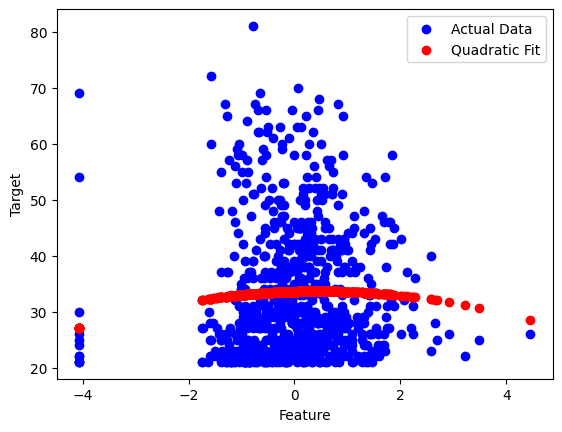

In [5]:
plt.scatter(X, y, color="blue", label="Actual Data")
plt.scatter(X, y_pred, color="red", label="Quadratic Fit")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()